# <center>Chess Puzzle Rating Estimation Data Anaylsis</center>

# Dataset Descriptions


| **Field Name** | **Field Description** | **Field Type** | **Example Value** |
|----------------|-----------------------|----------------|-------------------|
| PuzzleId       | Unique puzzle ID       | string         | 00sHx             |
| FEN            | Board position in standard notation | string         | `q3k1nr/1pp1nQpp/3p4/1P2p3/4P3/B1PP1b2/B5PP/5K2 b k - 0 17` |
| Moves          | Solution to the puzzle in PGN | string         | `e8d7 a2e6 d7d8 f7f8` |
| Rating         | Puzzle rating          | int            | 1760              |
| RatingDeviation    | Measure of uncertainty over difficulty | int            | 85                |
| Popularity         | Difference between upvotes and downvotes | int            | 10                |
| NbPlays            | Number of attempts at solving the puzzle | int            | 350               |
| Themes             | Puzzle themes                        | string         | mates in 2 moves  |
| GameUrl            | Puzzle source link                   | string         | https://lichess.org/game1 |
| OpeningTags        | Opening from which the puzzle originated | string         | Sicilian Defense  |


## Fen Feature Detailed Description

The FEN (Forsyth-Edwards Notation) is a standard notation for describing the position of pieces on a chessboard. Each FEN string consists of six space-separated fields that fully describe the current game state.

### FEN Format:
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1


#### 1. Piece Placement (Field 1)
This is the first section of the FEN string and describes the positions of all pieces on the board, starting from the 8th rank (black’s back rank) down to the 1st rank (white’s back rank).

- **Letters** represent pieces:
  - Uppercase for white pieces (`R` for rook, `N` for knight, `B` for bishop, `Q` for queen, `K` for king, `P` for pawn).
  - Lowercase for black pieces (`r`, `n`, `b`, `q`, `k`, `p`).
- **Numbers** represent empty squares:
  - For example, `8` means the entire row is empty, while `3` means three empty squares.
  
Example:
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR

This represents the standard starting position of a chess game.

#### 2. Active Color (Field 2)
This indicates which player’s turn it is to move:
- **`w`** for white to move.
- **`b`** for black to move.

Example:
w

It is white's turn to move.

#### 3. Castling Availability (Field 3)
This section shows which players still have the right to castle (kingside or queenside).
- **`K`**: White can castle kingside.
- **`Q`**: White can castle queenside.
- **`k`**: Black can castle kingside.
- **`q`**: Black can castle queenside.
- **`-`**: Neither side can castle.

Example:
KQkq

Both players can still castle kingside and queenside.

#### 4. En Passant Target Square (Field 4)
If the last move was a two-square pawn advance, this field will indicate the square where an en passant capture is possible. If no en passant capture is possible, this field will contain `-`.

Example:
e3

White has just moved a pawn two squares forward, allowing black to capture en passant on e3.

#### 5. Halfmove Clock (Field 5)
This counts the number of halfmoves (ply) since the last capture or pawn move. This is used to track the 50-move rule, which can result in a draw if no pawn move or capture has been made in the last 50 moves.

Example:
0

There has been a recent capture or pawn move.

#### 6. Fullmove Number (Field 6)
This indicates the number of full moves in the game. It starts at 1 and increments after each black move.

Example:
1

This is the first move of the game.

---

#### Example FEN Breakdown:
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1


- **Piece Placement**: `rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR` shows the pieces in their starting positions.
- **Active Color**: `w` indicates it is white’s move.
- **Castling Availability**: `KQkq` means both players can still castle both kingside and queenside.
- **En Passant Target Square**: `-` means no en passant capture is possible.
- **Halfmove Clock**: `0` indicates no moves have been made that would reset the clock (like pawn moves or captures).
- **Fullmove Number**: `1` indicates it is the first move of the game.

This structure fully encapsulates the current state of a chess game in a compact format.



In [4]:
!pip install seaborn

In [1]:
from chess import Board
import chess

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../data/raw/lichess_db_puzzle.csv') 

In [ ]:
df.iloc[0, :]

PuzzleId                                                       00008
FEN                r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...
Moves                                  f2g3 e6e7 b2b1 b3c1 b1c1 h6c1
Rating                                                          1917
RatingDeviation                                                   76
Popularity                                                        94
NbPlays                                                         6044
Themes                         crushing hangingPiece long middlegame
GameUrl                        https://lichess.org/787zsVup/black#47
OpeningTags                                                      NaN
Name: 0, dtype: object

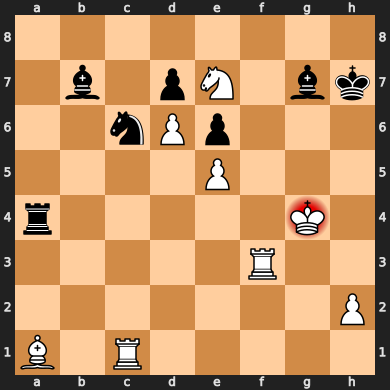

In [23]:
Board("8/1b1pN1bk/2nPp3/4P3/r5K1/5R2/7P/B1R5 w - - 4 35")

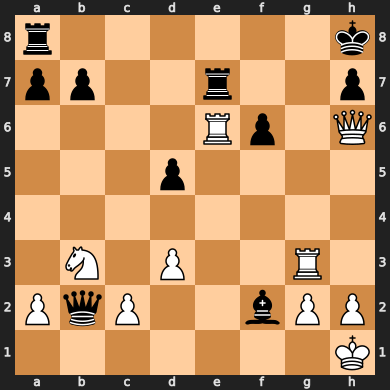

In [4]:
Board(df['FEN'][0])


In [5]:
df.head() 

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1917,76,94,6044,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#47,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1485,74,96,25966,advantage endgame short,https://lichess.org/F8M8OS71#52,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1420,74,90,541,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#126,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1123,74,87,567,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#31,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1556,81,73,91,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#104,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888765 entries, 0 to 3888764
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   PuzzleId         object
 1   FEN              object
 2   Moves            object
 3   Rating           int64 
 4   RatingDeviation  int64 
 5   Popularity       int64 
 6   NbPlays          int64 
 7   Themes           object
 8   GameUrl          object
 9   OpeningTags      object
dtypes: int64(4), object(6)
memory usage: 296.7+ MB


In [7]:
df.describe()

,Rating,RatingDeviation,Popularity,NbPlays
count,3.888765e+06,3.888765e+06,3.888765e+06,3.888765e+06
mean,1.515566e+03,9.027605e+01,8.354723e+01,1.674349e+03
std,5.432348e+02,4.303419e+01,2.140293e+01,4.459941e+03
min,3.990000e+02,4.900000e+01,-1.000000e+02,0.000000e+00
25%,1.085000e+03,7.500000e+01,8.200000e+01,9.300000e+01
50%,1.478000e+03,7.800000e+01,8.900000e+01,3.710000e+02
75%,1.917000e+03,8.800000e+01,9.300000e+01,1.325000e+03
max,3.331000e+03,5.000000e+02,1.000000e+02,1.007625e+06


In [8]:
df.nunique()

PuzzleId           3888765
FEN                3886000
Moves              3251540
Rating                2764
RatingDeviation        446
Popularity             200
NbPlays              28834
Themes               46152
GameUrl            3888765
OpeningTags           1352
dtype: int64

## Exploratory Data Analysis

### 1. NaN Analysis

/tmp/ipykernel_45015/2572467672.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(value, index, f'{value} ({nan_analysis["Percentage"][index]:.2f}%)', va='center')


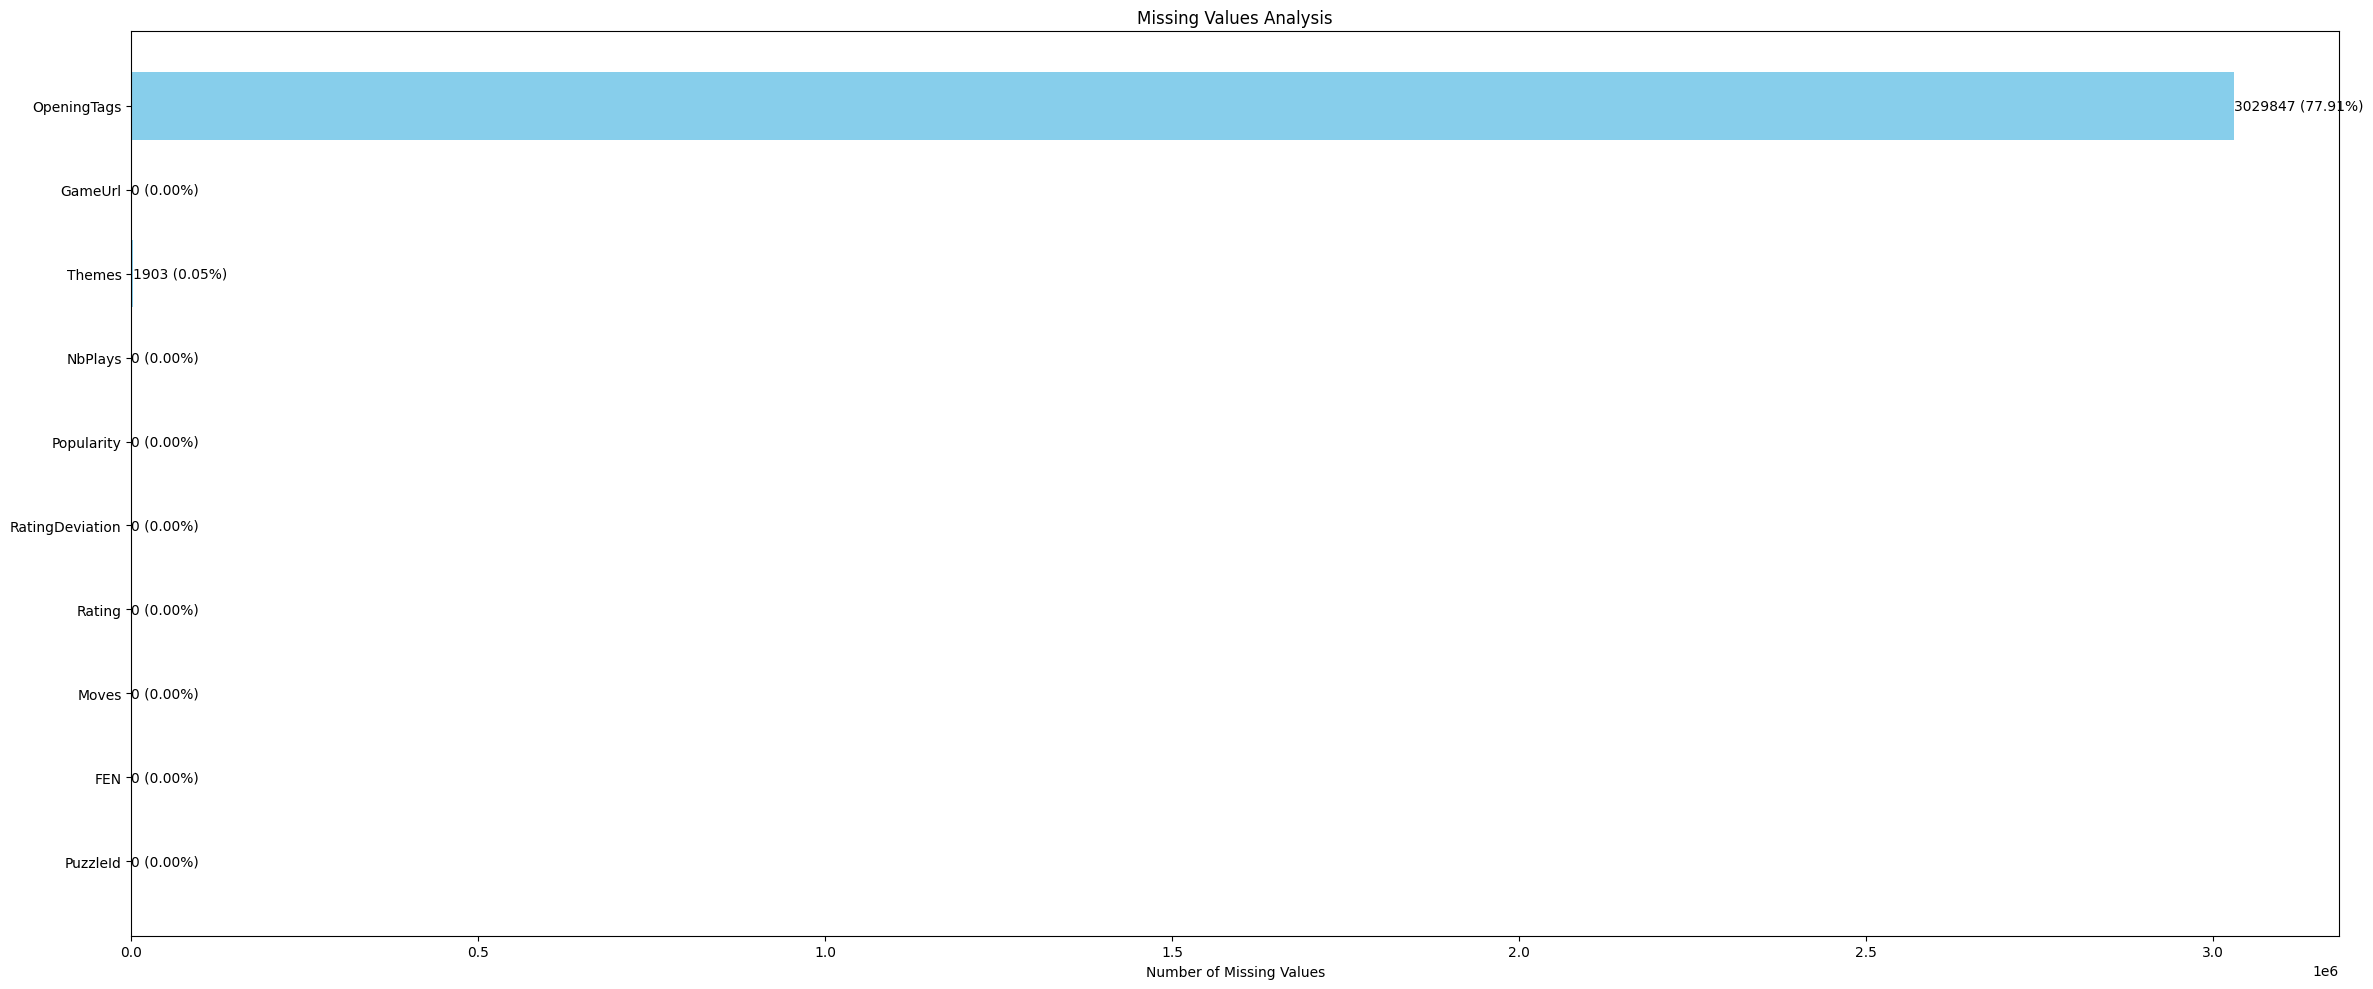

In [6]:
nan_summary = df.isna().sum()
nan_percentage = (nan_summary / len(df)) * 100

nan_analysis = pd.DataFrame({
    'Missing Values': nan_summary,
    'Percentage': nan_percentage
})

plt.figure(figsize=(24, 10))
plt.barh(nan_analysis.index, nan_analysis['Missing Values'], color='skyblue')
plt.xlabel('Number of Missing Values')
plt.title('Missing Values Analysis')

for index, value in enumerate(nan_analysis['Missing Values']):
    plt.text(value, index, f'{value} ({nan_analysis["Percentage"][index]:.2f}%)', va='center')

plt.tight_layout()
plt.show()

In [45]:
df[df['RatingDeviation'] < 80]


,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1917,76,94,6044,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#47,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1485,74,96,25966,advantage endgame short,https://lichess.org/F8M8OS71#52,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1420,74,90,541,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#126,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1123,74,87,567,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#31,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1368,74,93,556,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#68,NaN
...,...,...,...,...,...,...,...,...,...,...
3888757,zzzTs,r2qrk2/pb1n1ppQ/1p2p3/2pP2b1/3P4/3B1NN1/PP3PPP...,g5c1 d5d6 d7f6 h7h8,1924,75,91,381,advantage middlegame short,https://lichess.org/8SAGnBjb/black#31,Queens_Gambit_Declined Queens_Gambit_Declined_...
3888759,zzzYp,3r1rk1/3pN1pp/nq3pn1/1pp1p1QN/4P3/5P2/2P3PP/3R...,g8h8 e7g6 h7g6 g5g6,1073,77,89,592,crushing kingsideAttack middlegame short,https://lichess.org/Yc8Fdtc0/black#51,NaN
3888760,zzzc4,3r3k/p5pp/8/5R2/1BQ1p3/P3q3/Bb4PP/6K1 w - - 0 28,g1f1 d8d1 b4e1 e3e1,1025,76,89,370,mate mateIn2 middlegame short,https://lichess.org/jRTmvh6y#54,NaN
3888761,zzzco,5Q2/pp3R1P/1kpp4/4p3/2P1P3/3PP2P/Pr2q3/2K5 w -...,f7f2 b2c2 c1b1 e2d1,1674,75,88,1080,endgame mate mateIn2 queensideAttack short,https://lichess.org/hZWTYIAT#68,NaN


- OpeningTags feature has huge amount of NaN values. Therefore it should be eliminated. 

### 2. Puzzle Rating Distribution

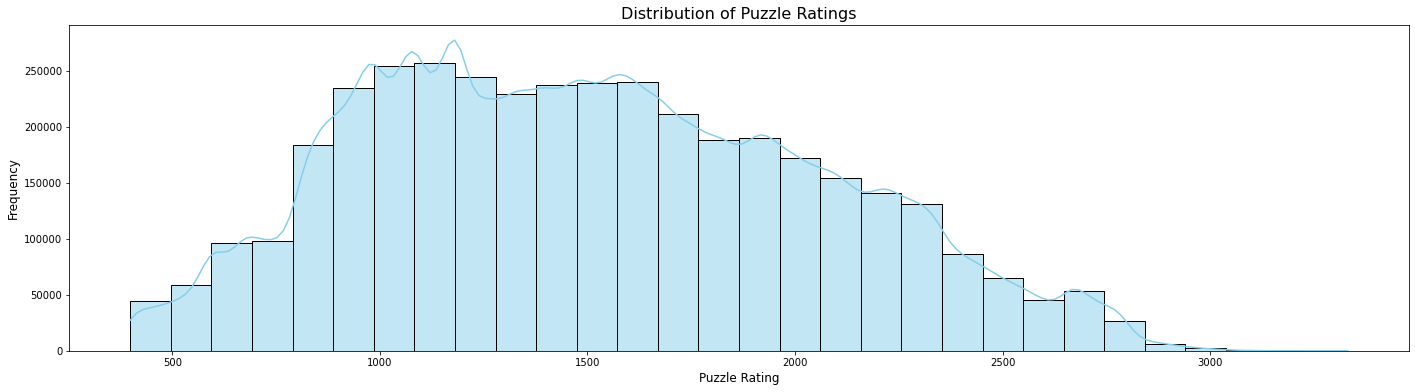

In [10]:
plt.figure(figsize=(24, 6))
sns.histplot(df['Rating'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Puzzle Ratings', fontsize=16)
plt.xlabel('Puzzle Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

- Data looks like has right-skewed distribution. It means that the developed model will be biased to the 500-1700 rating. 
    * Developer should consider the balancing targets (ex: Duplication)
    * Weighted loss function could be used.
    * Mean Absolute Percentage Error (MAPE) can be used.
    * Log transformation can be applied.
    * Cross validation can be applied

### 3. Puzzle Popularity vs Rating

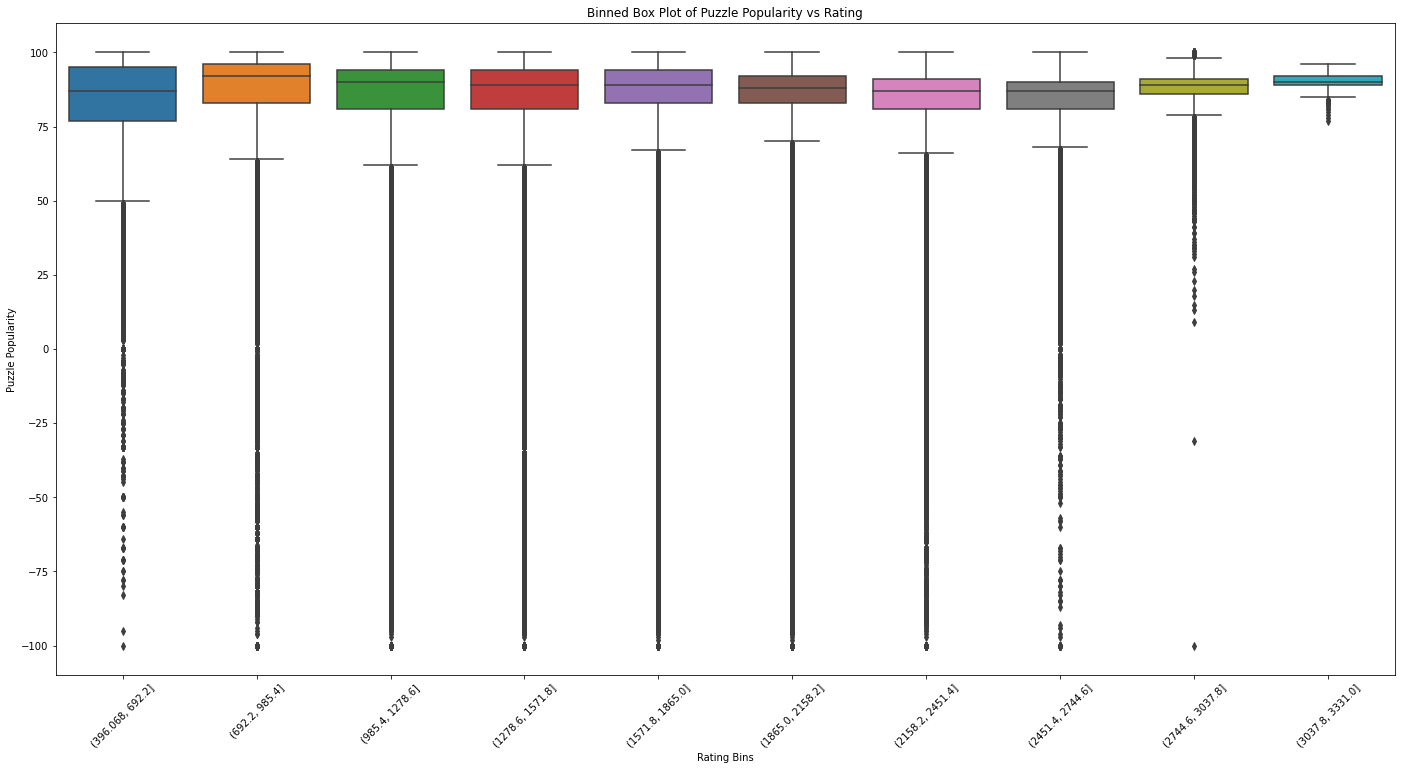

In [11]:
df['Rating_bin'] = pd.cut(df['Rating'], bins=10)
plt.figure(figsize=(24, 12))
sns.boxplot(x='Rating_bin', y='Popularity', data=df)
plt.xticks(rotation=45)
plt.title('Binned Box Plot of Puzzle Popularity vs Rating')
plt.xlabel('Rating Bins')
plt.ylabel('Puzzle Popularity')
plt.show()


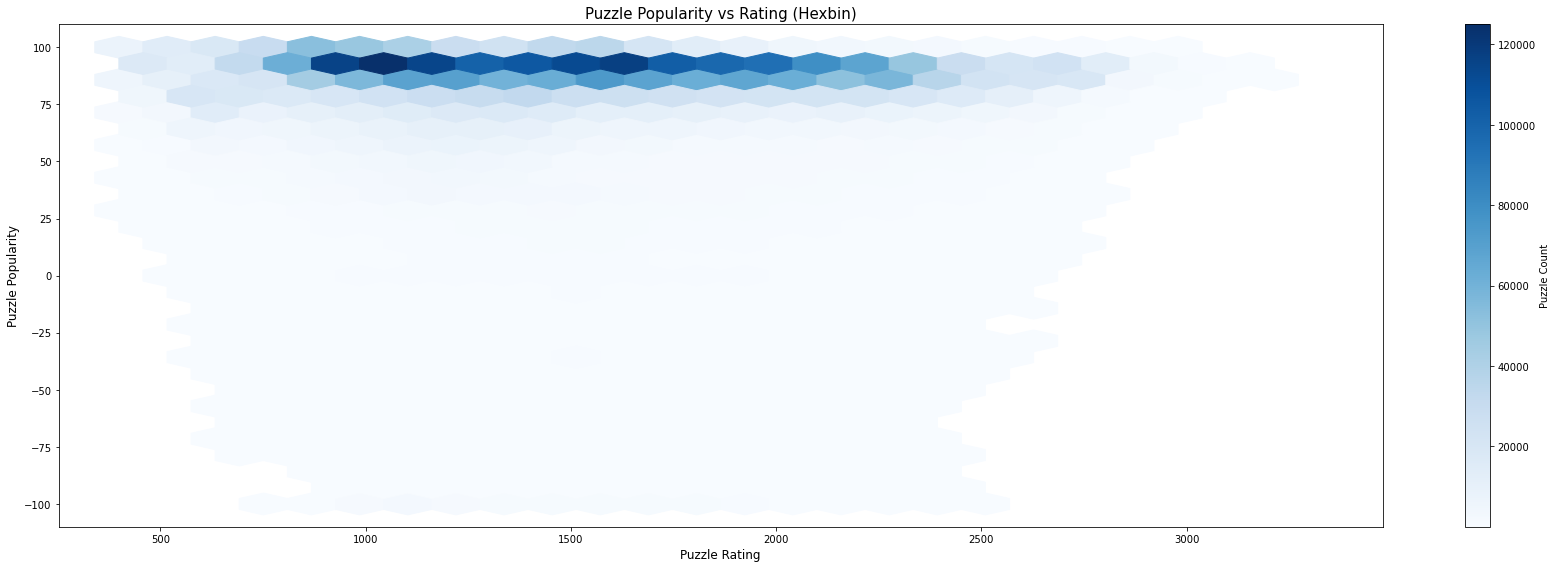

In [12]:
plt.figure(figsize=(24, 8))
plt.hexbin(df['Rating'], df['Popularity'], gridsize=25, cmap='Blues', mincnt=5, alpha=1)
plt.colorbar(label='Puzzle Count')
plt.title('Puzzle Popularity vs Rating (Hexbin)', fontsize=15)
plt.xlabel('Puzzle Rating', fontsize=12)
plt.ylabel('Puzzle Popularity', fontsize=12)

plt.tight_layout()
plt.show()


- Most of the puzzles, regardless of their rating, tend to have relatively high popularity.
- There are also significant amount of puzzels that has the negative popularity. Should be think about that the reasons for this.
- There is no direct realtion between puzzle rating and popularity.

### 4. Puzzle Popularity vs Number of Plays

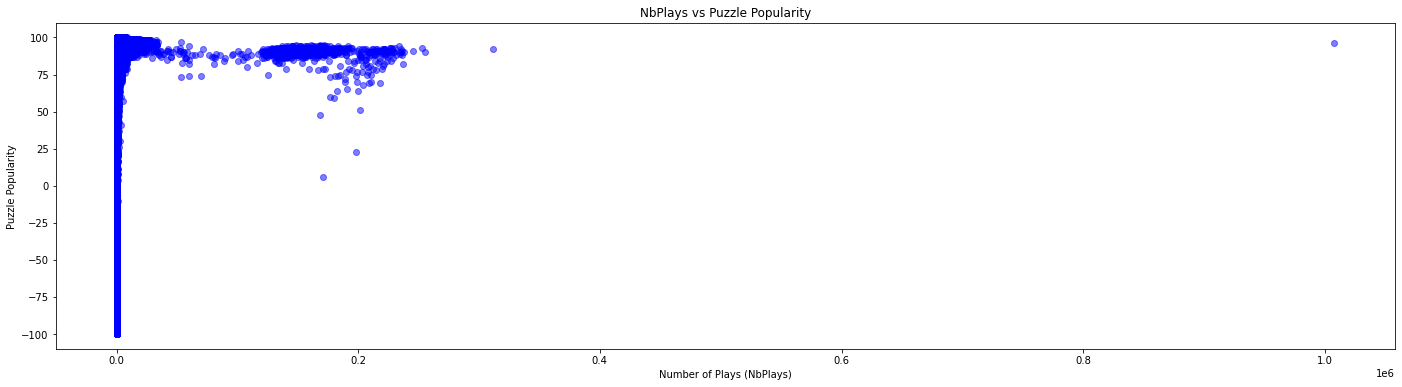

In [13]:
plt.figure(figsize=(24, 6))
plt.scatter(df['NbPlays'], df['Popularity'], alpha=0.5, color='blue')
plt.title('NbPlays vs Puzzle Popularity')
plt.xlabel('Number of Plays (NbPlays)')
plt.ylabel('Puzzle Popularity')
plt.show()


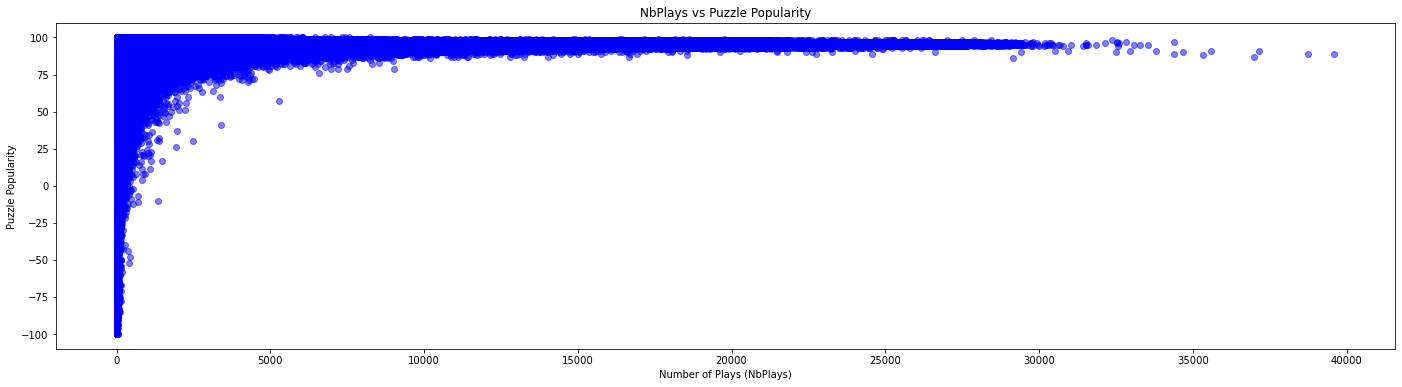

In [14]:
filtered_df = df[df['NbPlays'] < 40000]
plt.figure(figsize=(24, 6))
plt.scatter(filtered_df['NbPlays'], filtered_df['Popularity'], alpha=0.5, color='blue')
plt.title('NbPlays vs Puzzle Popularity')
plt.xlabel('Number of Plays (NbPlays)')
plt.ylabel('Puzzle Popularity')
plt.show()


- There is increasing popularity with increasing Number of Plays as expected.

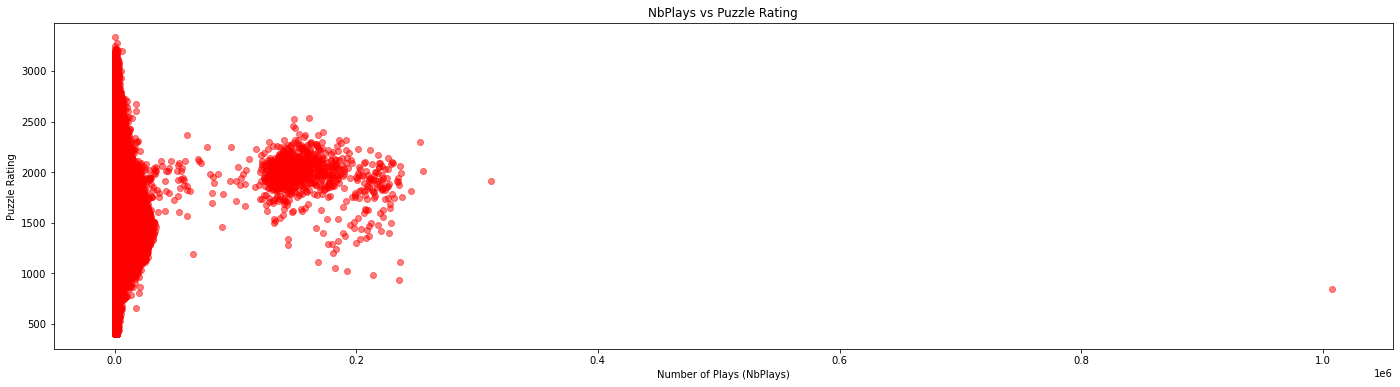

In [15]:
plt.figure(figsize=(24, 6))
plt.scatter(df['NbPlays'], df['Rating'], alpha=0.5, color='red')
plt.title('NbPlays vs Puzzle Rating')
plt.xlabel('Number of Plays (NbPlays)')
plt.ylabel('Puzzle Rating')
plt.show()


### 5. Move Length vs Puzzle Rating

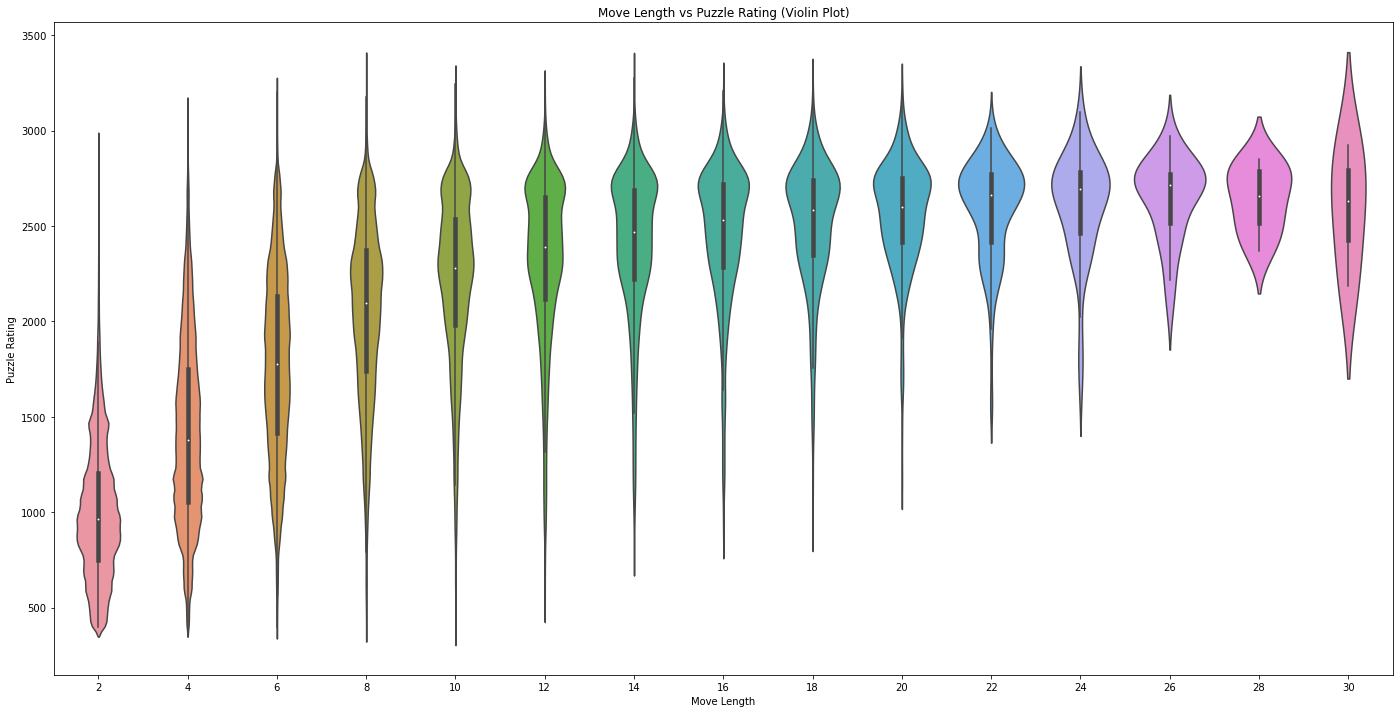

In [16]:
df['MoveLength'] = df['Moves'].apply(lambda x: len(x.split()))
plt.figure(figsize=(24, 12))
sns.violinplot(x=df['MoveLength'], y=df['Rating'])
plt.title('Move Length vs Puzzle Rating (Violin Plot)')
plt.xlabel('Move Length')
plt.ylabel('Puzzle Rating')
plt.show()


- Increasing move lengths causes increase on the puzzle rating as expected.
- Violin plots shows the skewness of the each bin.

### 6. Puzzle Rating Deviation Distribtuion

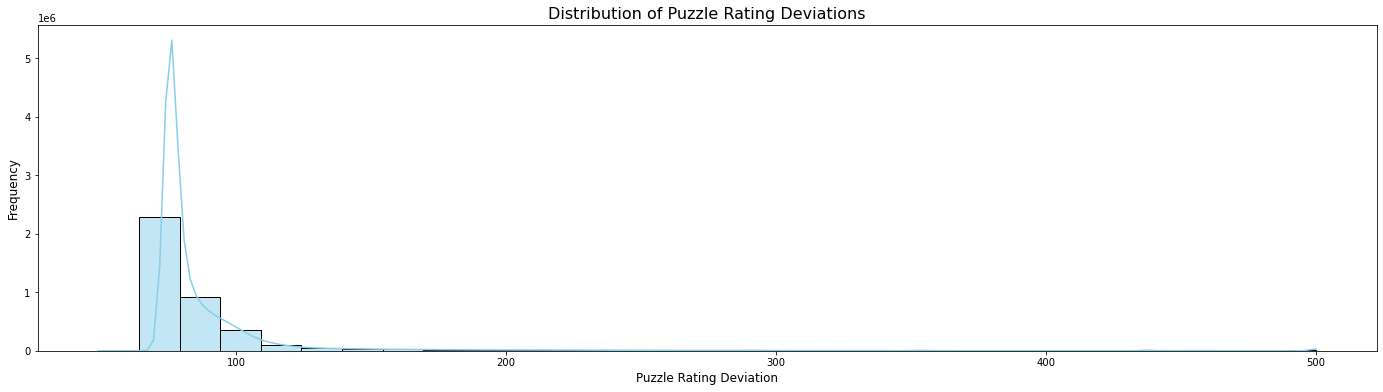

In [17]:
plt.figure(figsize=(24, 6))
sns.histplot(df['RatingDeviation'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Puzzle Rating Deviations', fontsize=16)
plt.xlabel('Puzzle Rating Deviation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

- Most of the puzzles has fair rating

### 7. Puzzle Rating vs Rating Deviation

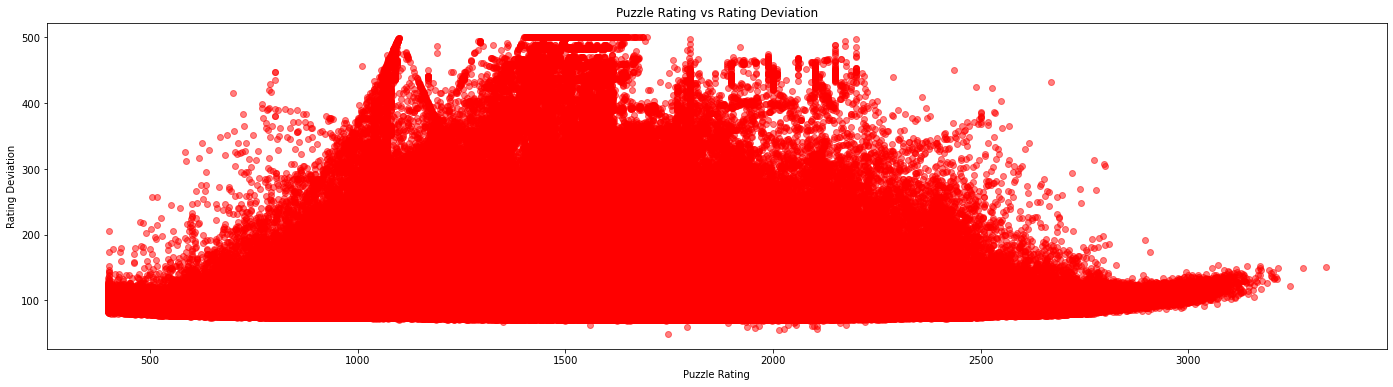

In [18]:
plt.figure(figsize=(24, 6))
plt.scatter(df['Rating'], df['RatingDeviation'], alpha=0.5, color='red')
plt.title('Puzzle Rating vs Rating Deviation')
plt.xlabel('Puzzle Rating')
plt.ylabel('Rating Deviation')
plt.show()


- Lower and higher ratings has more stable deviation as compared the middle values

### 8. Themes Frequency

In [19]:
themes_counts = df['Themes'].value_counts()
len(themes_counts[themes_counts > 50000])
themes_counts_reduced = themes_counts.head(15)

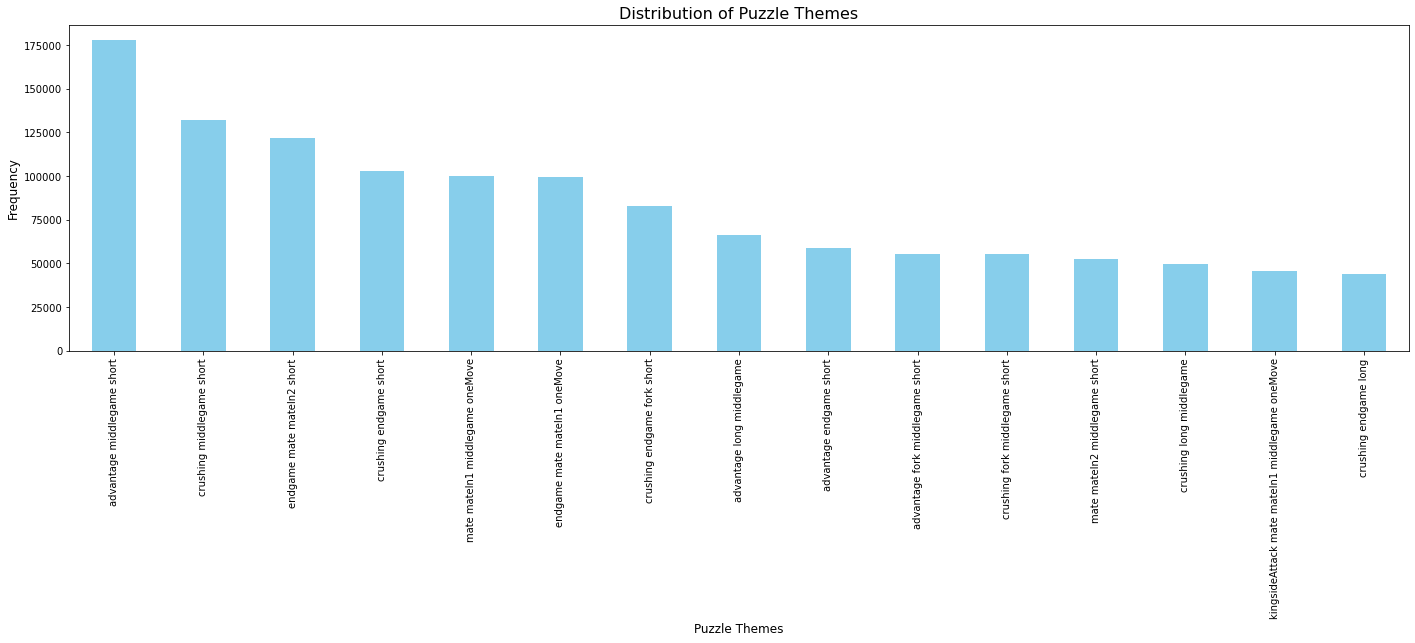

In [20]:
plt.figure(figsize=(24, 6))
themes_counts_reduced.plot(kind='bar', color='skyblue', )

plt.title('Distribution of Puzzle Themes', fontsize=16)
plt.xlabel('Puzzle Themes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

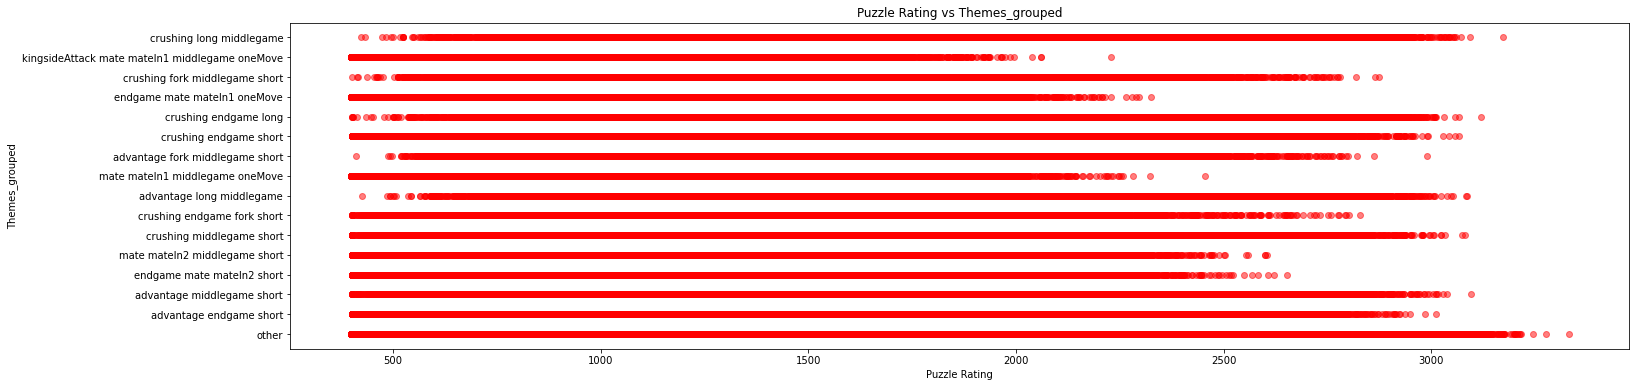

In [21]:
df['Themes_grouped'] = df['Themes'].apply(lambda x: x if x in themes_counts_reduced.index else "other")
plt.figure(figsize=(24, 6))
plt.scatter(df['Rating'], df['Themes_grouped'], alpha=0.5, color='red')
plt.title('Puzzle Rating vs Themes_grouped')
plt.xlabel('Puzzle Rating')
plt.ylabel('Themes_grouped')
plt.show()

## Feature Engineering

`q3k1nr/1pp1nQpp/3p4/1P2p3/4P3/B1PP1b2/B5PP/5K2 b k - 0 17`

### White to Move

In [22]:
def calculate_white_to_move(fen):
    return 1 if fen.split()[1].lower() == 'w' else 0

df['WhiteToMove'] = df['FEN'].apply(calculate_white_to_move)

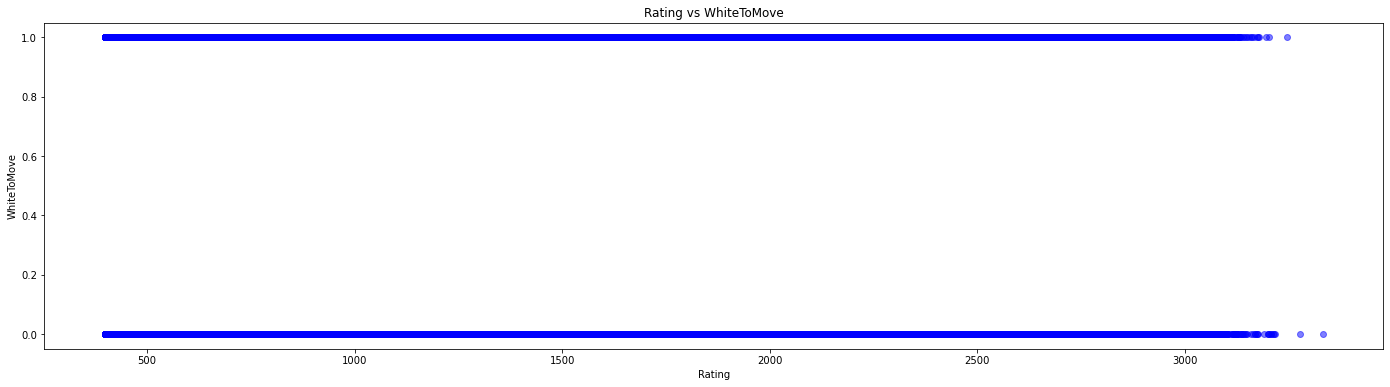

In [23]:
plt.figure(figsize=(24, 6))
plt.scatter(df['Rating'], df['WhiteToMove'], alpha=0.5, color='blue')
plt.title('Rating vs WhiteToMove')
plt.xlabel('Rating')
plt.ylabel('WhiteToMove')
plt.show()

### Phase of the Game

In [24]:
def calculate_game_phase(fen):
    mn = int(fen.split()[5]) 
    if mn <= 10:
        return "Opening"
    elif 10 < mn <= 20:
        return "Early Middlegame"
    elif 20 < mn <= 30:
        return "Middlegame"
    elif 30 < mn <= 40:
        return "Late Middlegame"
    else:
        return "Endgame"


In [25]:
df['GamePhase'] = df['FEN'].apply(calculate_game_phase)

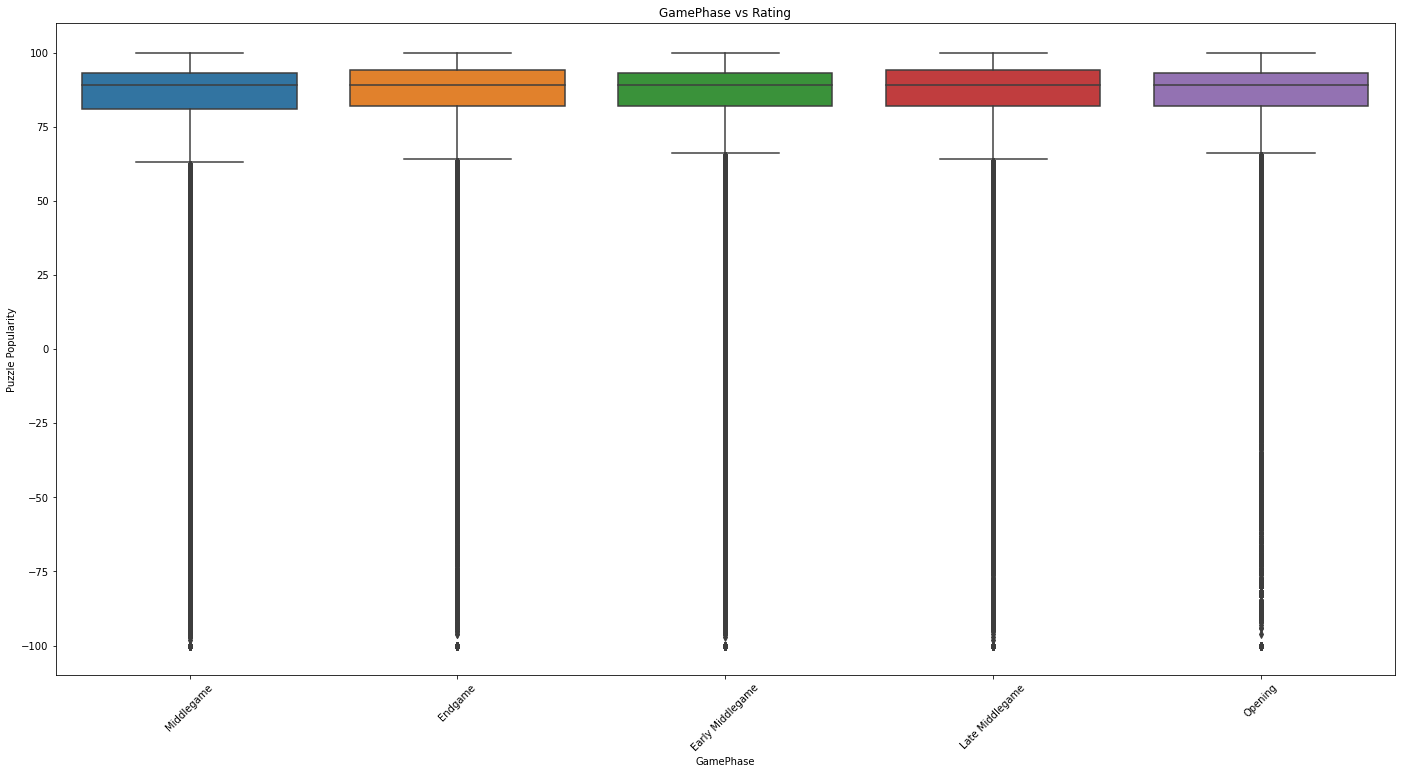

In [26]:
plt.figure(figsize=(24, 12))
sns.boxplot(x='GamePhase', y='Popularity', data=df)
plt.xticks(rotation=45)
plt.title('GamePhase vs Rating')
plt.xlabel('GamePhase')
plt.ylabel('Puzzle Popularity')
plt.show()


### Material Balance

In [27]:
def calculate_material_balance(fen):
    piece_values = {'p': 1, 'n': 3, 'b': 3, 'r': 5, 'q': 9, 'k': 0}  
    white_pieces = sum([piece_values.get(c.lower(), 0) for c in fen.split()[0] if c.isupper()])
    black_pieces = sum([piece_values.get(c.lower(), 0) for c in fen.split()[0] if c.islower()])
    return white_pieces - black_pieces

df['MaterialAdvantage'] = df['FEN'].apply(calculate_material_balance)

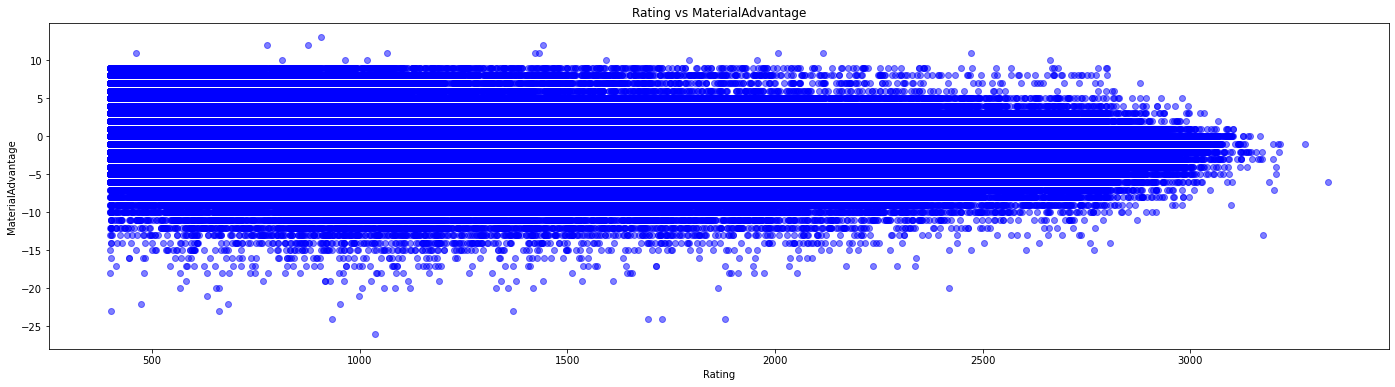

In [28]:
filtered_df = df[df['WhiteToMove'] == 0]
plt.figure(figsize=(24, 6))
plt.scatter(filtered_df['Rating'], filtered_df['MaterialAdvantage'], alpha=0.5, color='blue')
plt.title('Rating vs MaterialAdvantage')
plt.xlabel('Rating')
plt.ylabel('MaterialAdvantage')
plt.show()

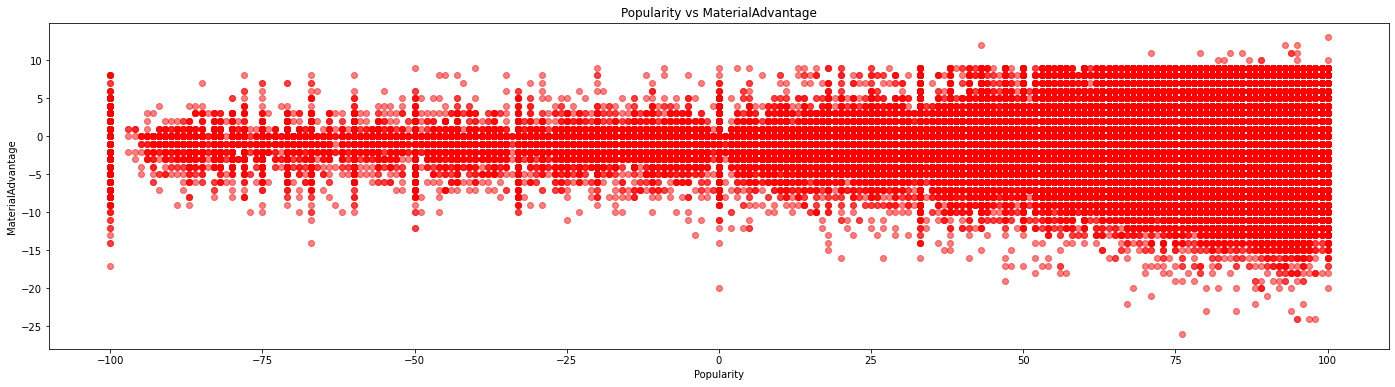

In [29]:
filtered_df = df[df['WhiteToMove'] == 0]
plt.figure(figsize=(24, 6))
plt.scatter(filtered_df['Popularity'], filtered_df['MaterialAdvantage'], alpha=0.5, color='red')
plt.title('Popularity vs MaterialAdvantage')
plt.xlabel('Popularity')
plt.ylabel('MaterialAdvantage')
plt.show()


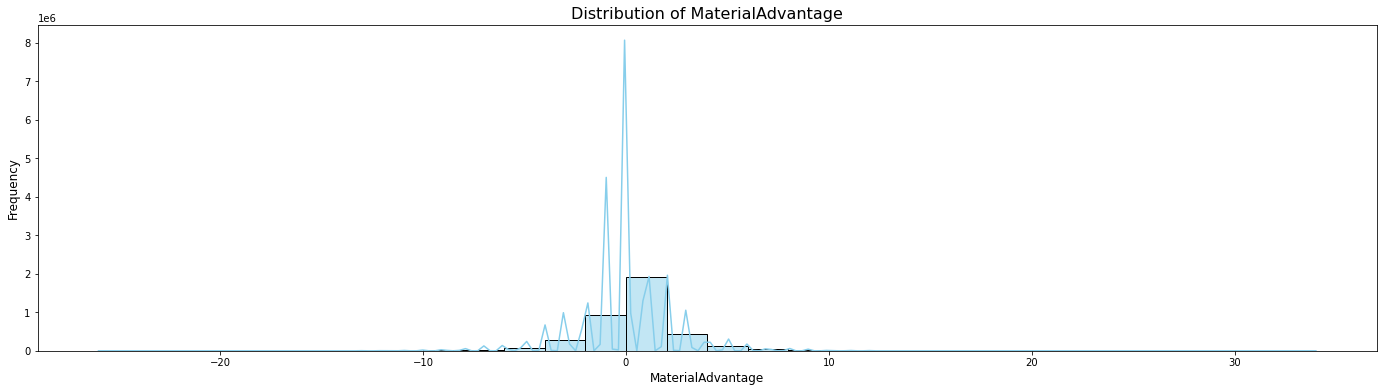

In [30]:
plt.figure(figsize=(24, 6))
sns.histplot(df['MaterialAdvantage'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of MaterialAdvantage', fontsize=16)
plt.xlabel('MaterialAdvantage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Piece Count Imbalance

In [31]:
def calculate_piece_count_imbalance(fen):
    white_pieces = sum([1 for c in fen.split()[0] if c.isupper()])
    black_pieces = sum([1 for c in fen.split()[0] if c.islower()])
    return white_pieces - black_pieces

df['PieceCountImbalance'] = df['FEN'].apply(calculate_piece_count_imbalance)

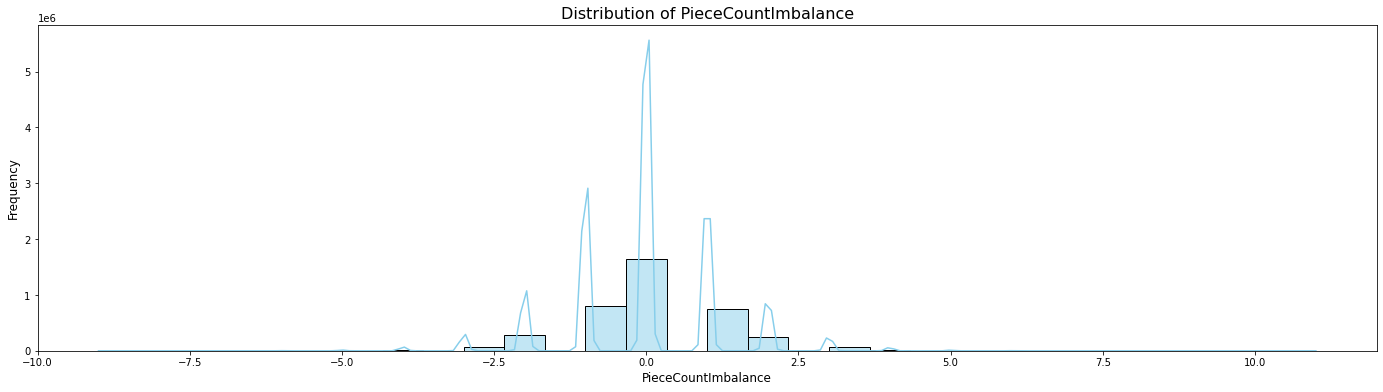

In [32]:
plt.figure(figsize=(24, 6))
sns.histplot(df['PieceCountImbalance'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of PieceCountImbalance', fontsize=16)
plt.xlabel('PieceCountImbalance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Count Isolated Pawns 

In [33]:
def count_isolated_pawns(fen):
    files = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    board_rows = fen.split()[0].split('/')
    white_pawn_positions = set()
    black_pawn_positions = set()

    for row in board_rows:
        row_index = 8 - board_rows.index(row)
        file_index = 0
        for char in row:
            if char.isdigit():
                file_index += int(char)
            elif char == 'P':  # White pawn
                white_pawn_positions.add((files[file_index], row_index))
                file_index += 1
            elif char == 'p':  # Black pawn
                black_pawn_positions.add((files[file_index], row_index))
                file_index += 1

    def count_isolated(pawn_positions):
        isolated_count = 0
        for file, _ in pawn_positions:
            adjacent_files = [files[files.index(file)-1] if files.index(file) > 0 else None,
                              files[files.index(file)+1] if files.index(file) < 7 else None]
            if not any((adjacent_file, _) in pawn_positions for adjacent_file in adjacent_files):
                isolated_count += 1
        return isolated_count

    return count_isolated(white_pawn_positions), count_isolated(black_pawn_positions)

df['WhiteIsolatedPawns'], df['BlackIsolatedPawns'] = zip(*df['FEN'].apply(count_isolated_pawns))

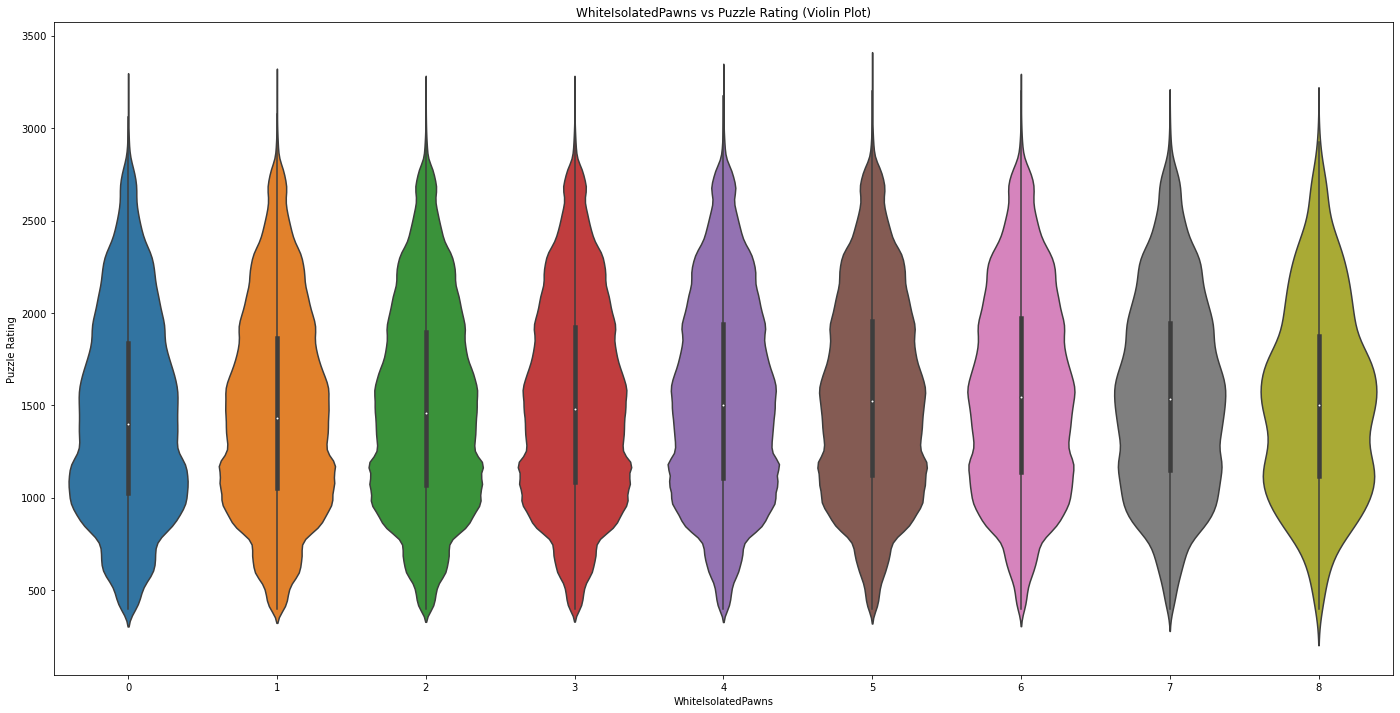

In [34]:
plt.figure(figsize=(24, 12))
sns.violinplot(x=df['WhiteIsolatedPawns'], y=df['Rating'])
plt.title('WhiteIsolatedPawns vs Puzzle Rating (Violin Plot)')
plt.xlabel('WhiteIsolatedPawns')
plt.ylabel('Puzzle Rating')
plt.show()


### Proximity to Center

In [35]:
def calculate_proximity_to_center(fen):
    center_squares = {'d4', 'd5', 'e4', 'e5'}
    board_rows = fen.split()[0].split('/')
    white_pieces_in_center = 0
    black_pieces_in_center = 0
    files = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    
    row_index = 8
    for row in board_rows:
        file_index = 0
        for char in row:
            if char.isdigit():
                file_index += int(char)
            elif char.isupper():  # White piece
                square = files[file_index] + str(row_index)
                if square in center_squares:
                    white_pieces_in_center += 1
                file_index += 1
            elif char.islower():  # Black piece
                square = files[file_index] + str(row_index)
                if square in center_squares:
                    black_pieces_in_center += 1
                file_index += 1
        row_index -= 1
    
    return white_pieces_in_center, black_pieces_in_center

df['WhiteCenterProximity'], df['BlackCenterProximity'] = zip(*df['FEN'].apply(calculate_proximity_to_center))

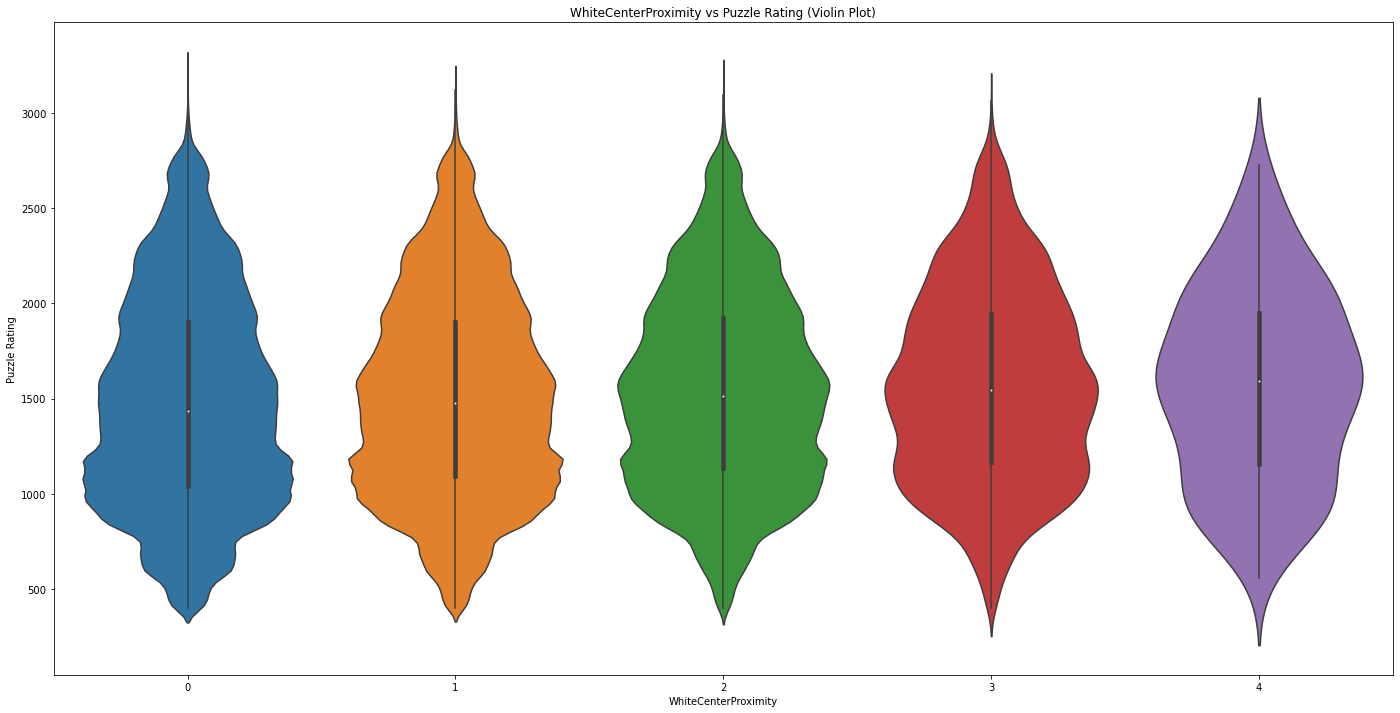

In [36]:
filtered_df = df[(df['WhiteToMove'] == 1) 
#                  & (df['GamePhase'] == "Opening")
                ]
plt.figure(figsize=(24, 12))
sns.violinplot(x=filtered_df['WhiteCenterProximity'], y=filtered_df['Rating'])
plt.title('WhiteCenterProximity vs Puzzle Rating (Violin Plot)')
plt.xlabel('WhiteCenterProximity')
plt.ylabel('Puzzle Rating')
plt.show()


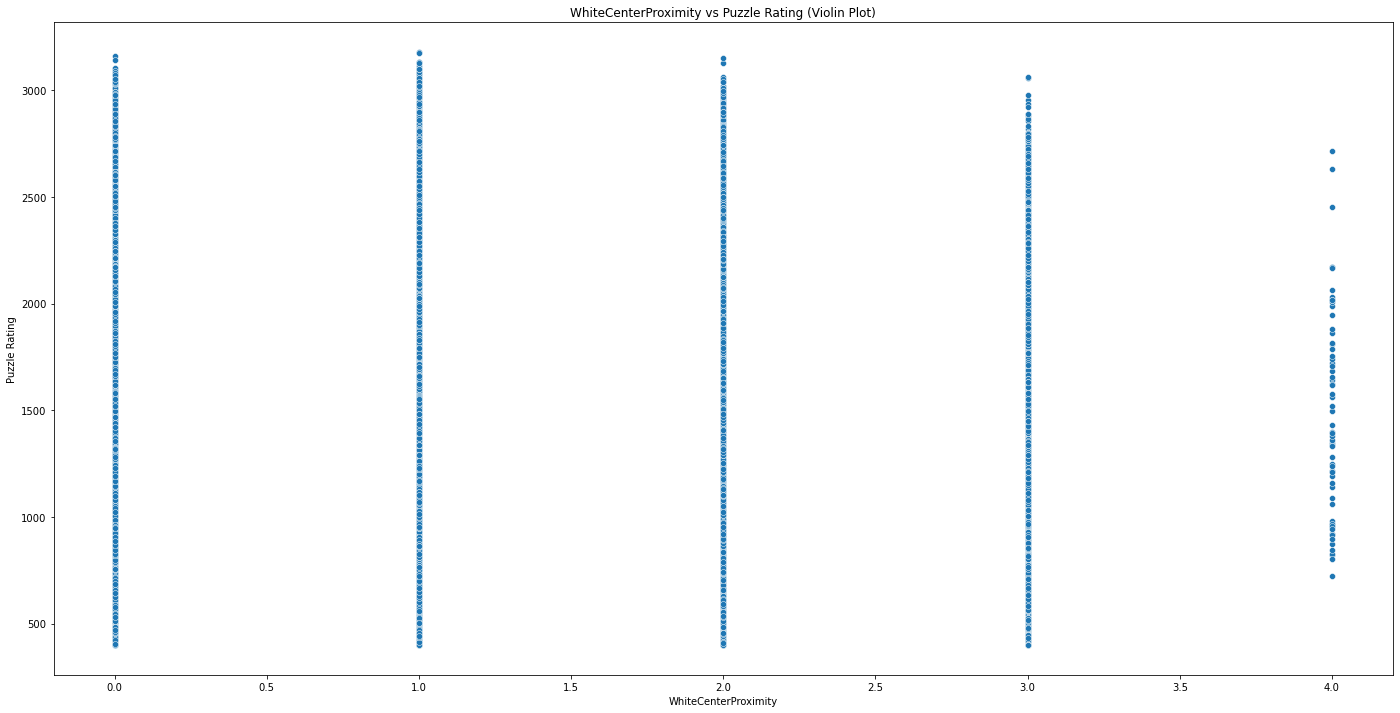

In [37]:
filtered_df = df[(df['WhiteToMove'] == 1) 
                 & (df['GamePhase'] == "Middlegame")
                ]
plt.figure(figsize=(24, 12))
sns.scatterplot(x=filtered_df['WhiteCenterProximity'], y=filtered_df['Rating'])
plt.title('WhiteCenterProximity vs Puzzle Rating (Violin Plot)')
plt.xlabel('WhiteCenterProximity')
plt.ylabel('Puzzle Rating')
plt.show()


### King Safety

In [38]:
def calculate_king_safety(fen):
    board_rows = fen.split()[0].split('/')
    white_king_position = None
    black_king_position = None

    row_index = 8
    for row in board_rows:
        file_index = 0
        for char in row:
            if char.isdigit():
                file_index += int(char)
            elif char == 'K':
                white_king_position = (row_index, file_index)
                file_index += 1
            elif char == 'k':
                black_king_position = (row_index, file_index)
                file_index += 1
        row_index -= 1

    def surrounding_pawns(king_position, board_rows, is_white):
        if not king_position:
            return 0
        row, file = king_position
        pawns_around_king = 0
        
        def parse_row(row):
            parsed_row = []
            for char in row:
                if char.isdigit():
                    parsed_row.extend([''] * int(char))  
                else:
                    parsed_row.append(char)
            return parsed_row

        parsed_board = [parse_row(row) for row in board_rows]

        for r in range(row - 1, row + 2):
            if 1 <= r <= 8:  
                for f in range(file - 1, file + 2):
                    if 0 <= f < 8: 
                        piece = parsed_board[8 - r][f] 
                        if (is_white and piece == 'P') or (not is_white and piece == 'p'):
                            pawns_around_king += 1
        return pawns_around_king

    white_king_safety = surrounding_pawns(white_king_position, board_rows, True)
    black_king_safety = surrounding_pawns(black_king_position, board_rows, False)

    return white_king_safety, black_king_safety

df['WhiteKingSafety'], df['BlackKingSafety'] = zip(*df['FEN'].apply(calculate_king_safety))


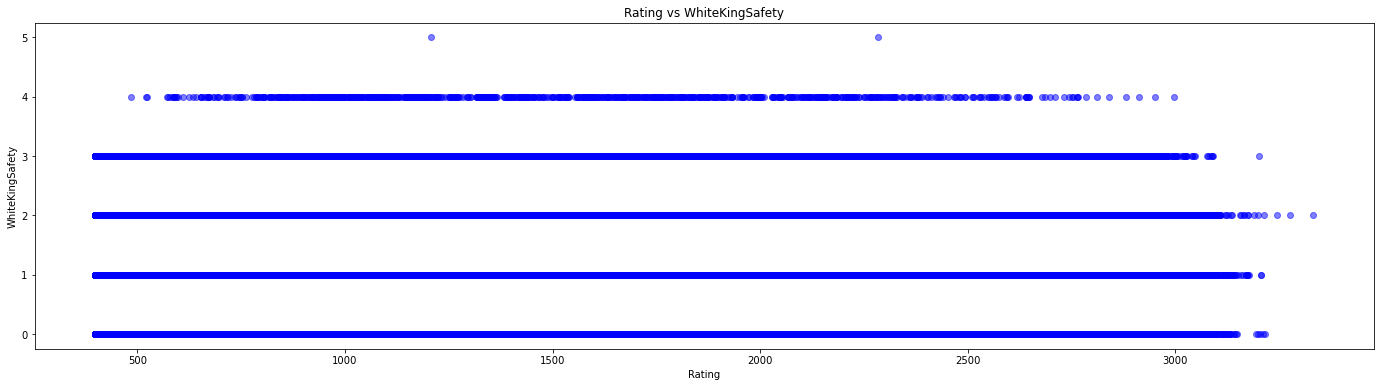

In [39]:
filtered_df = df[(df['WhiteToMove'] == 0) 
#                  & (df['GamePhase'] == "Late Middlegame")
                ]
plt.figure(figsize=(24, 6))
plt.scatter(df['Rating'], df['WhiteKingSafety'], alpha=0.5, color='blue')
plt.title('Rating vs WhiteKingSafety')
plt.xlabel('Rating')
plt.ylabel('WhiteKingSafety')
plt.show()

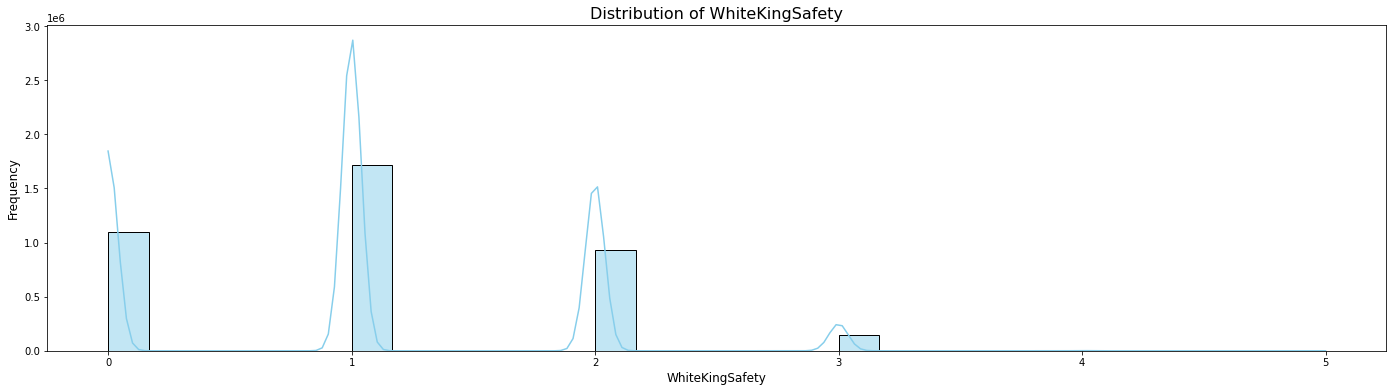

In [40]:
plt.figure(figsize=(24, 6))
sns.histplot(df['WhiteKingSafety'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of WhiteKingSafety', fontsize=16)
plt.xlabel('WhiteKingSafety', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Identify First Piece

In [41]:
def identify_first_piece(fen, moves):
    board = Board(fen)
    first_move = moves.split()[0]
    
    try: 
        move = chess.Move.from_uci(first_move)
        piece_moved = board.piece_at(move.from_square)
        if piece_moved:
            piece_type = piece_moved.piece_type
            piece_dict = {
                chess.PAWN: "Pawn",
                chess.KNIGHT: "Knight",
                chess.BISHOP: "Bishop",
                chess.ROOK: "Rook",
                chess.QUEEN: "Queen",
                chess.KING: "King",
            }
            return piece_dict.get(piece_type, "Unknown")
        return "Unknown"
    except:
        return "Invalid Move"
df['FirstMovedPiece'] = df.apply(lambda row: identify_first_piece(row['FEN'], row['Moves']), axis=1)        

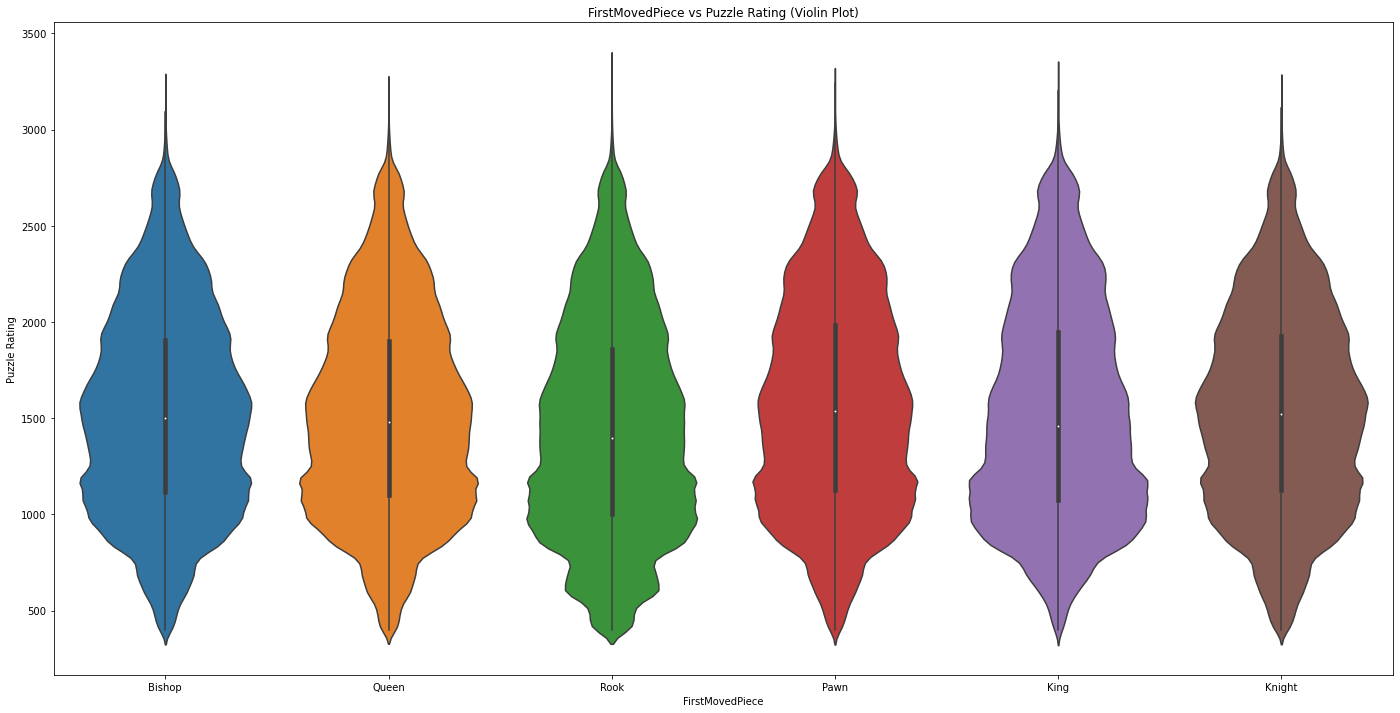

In [42]:
filtered_df = df
# [
#                   (df['WhiteToMove'] == 1) 
#                  & (df['GamePhase'] == "Opening")
#                 ]
plt.figure(figsize=(24, 12))
sns.violinplot(x=filtered_df['FirstMovedPiece'], y=filtered_df['Rating'])
plt.title('FirstMovedPiece vs Puzzle Rating (Violin Plot)')
plt.xlabel('FirstMovedPiece')
plt.ylabel('Puzzle Rating')
plt.show()


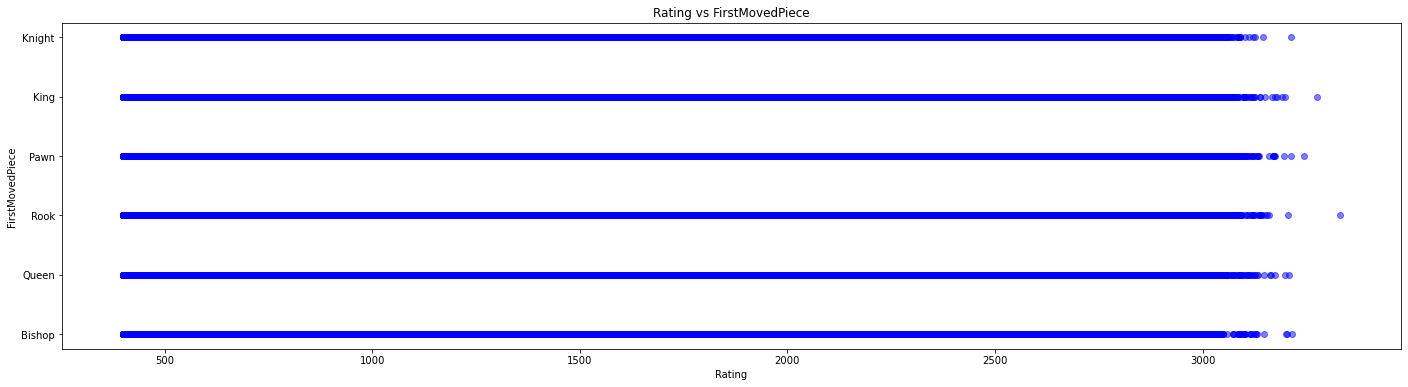

In [43]:
filtered_df = df
plt.figure(figsize=(24, 6))
plt.scatter(df['Rating'], df['FirstMovedPiece'], alpha=0.5, color='blue')
plt.title('Rating vs FirstMovedPiece')
plt.xlabel('Rating')
plt.ylabel('FirstMovedPiece')
plt.show()

### Piece Mobility

In [44]:
def calculate_piece_mobility(fen):
    board_rows = fen.split()[0].split('/')
    
    # Parse the FEN row to handle numbers indicating empty spaces
    def parse_row(row):
        parsed_row = []
        for char in row:
            if char.isdigit():
                parsed_row.extend([''] * int(char))  # Empty squares
            else:
                parsed_row.append(char)
        return parsed_row

    board = [parse_row(row) for row in board_rows]

    def valid_square(r, f):
        return 0 <= r < 8 and 0 <= f < 8

    def mobility_rook(r, f, board):
        moves = 0
        # Horizontal and vertical directions (up, down, left, right)
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        for dr, df in directions:
            nr, nf = r + dr, f + df
            while valid_square(nr, nf) and board[nr][nf] == '':
                moves += 1
                nr, nf = nr + dr, nf + df
        return moves

    def mobility_knight(r, f, board):
        moves = 0
        # Knight movement patterns
        knight_moves = [(2, 1), (2, -1), (-2, 1), (-2, -1), (1, 2), (-1, 2), (1, -2), (-1, -2)]
        for dr, df in knight_moves:
            nr, nf = r + dr, f + df
            if valid_square(nr, nf) and board[nr][nf] == '':
                moves += 1
        return moves

    def mobility_bishop(r, f, board):
        moves = 0
        # Diagonal directions (4 diagonals)
        directions = [(1, 1), (-1, -1), (1, -1), (-1, 1)]
        for dr, df in directions:
            nr, nf = r + dr, f + df
            while valid_square(nr, nf) and board[nr][nf] == '':
                moves += 1
                nr, nf = nr + dr, nf + df
        return moves

    def mobility_queen(r, f, board):
        # Queen's mobility is the sum of the rook's and bishop's mobility
        return mobility_rook(r, f, board) + mobility_bishop(r, f, board)

    def mobility_king(r, f, board):
        moves = 0
        # King can move one square in any direction
        king_moves = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]
        for dr, df in king_moves:
            nr, nf = r + dr, f + df
            if valid_square(nr, nf) and board[nr][nf] == '':
                moves += 1
        return moves

    def mobility_pawn(r, f, board, is_white):
        moves = 0
        direction = -1 if is_white else 1  # White moves up (-1), Black moves down (+1)
        nr = r + direction
        if valid_square(nr, f) and board[nr][f] == '':  # Forward move
            moves += 1
        if f > 0 and board[nr][f - 1] != '':  # Capture left
            moves += 1
        if f < 7 and board[nr][f + 1] != '':  # Capture right
            moves += 1
        return moves

    white_mobility = 0
    black_mobility = 0

    for r in range(8):
        for f in range(8):
            piece = board[r][f]
            if piece == 'R':  # White Rook
                white_mobility += mobility_rook(r, f, board)
            elif piece == 'r':  # Black Rook
                black_mobility += mobility_rook(r, f, board)
            elif piece == 'N':  # White Knight
                white_mobility += mobility_knight(r, f, board)
            elif piece == 'n':  # Black Knight
                black_mobility += mobility_knight(r, f, board)
            elif piece == 'B':  # White Bishop
                white_mobility += mobility_bishop(r, f, board)
            elif piece == 'b':  # Black Bishop
                black_mobility += mobility_bishop(r, f, board)
            elif piece == 'Q':  # White Queen
                white_mobility += mobility_queen(r, f, board)
            elif piece == 'q':  # Black Queen
                black_mobility += mobility_queen(r, f, board)
            elif piece == 'K':  # White King
                white_mobility += mobility_king(r, f, board)
            elif piece == 'k':  # Black King
                black_mobility += mobility_king(r, f, board)
            elif piece == 'P':  # White Pawn
                white_mobility += mobility_pawn(r, f, board, True)
            elif piece == 'p':  # Black Pawn
                black_mobility += mobility_pawn(r, f, board, False)

    return white_mobility, black_mobility

df['WhiteMobility'], df['BlackMobility'] = zip(*df['FEN'].apply(calculate_piece_mobility))


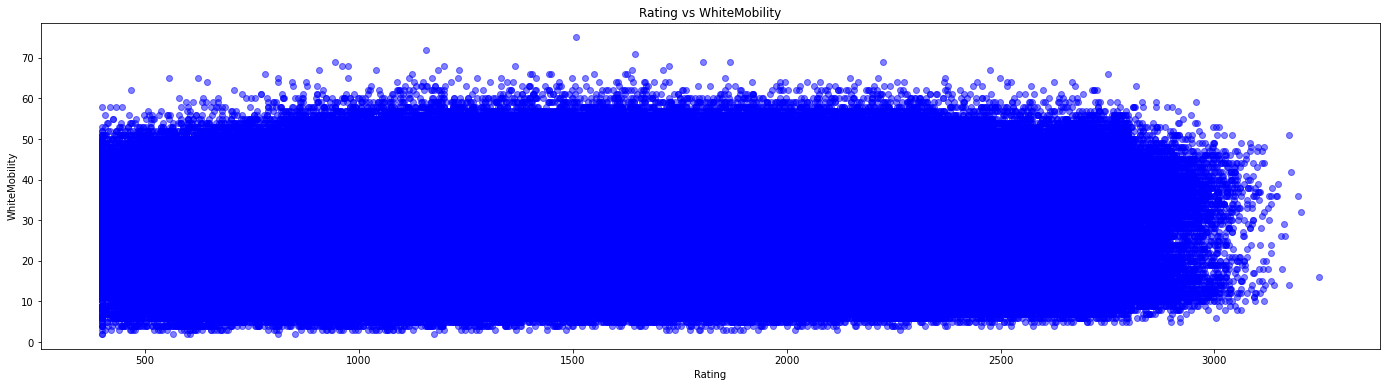

In [45]:
filtered_df = df[(df['WhiteToMove'] == 1) 
#                  & (df['GamePhase'] == "Late Middlegame")
                ]
plt.figure(figsize=(24, 6))
plt.scatter(filtered_df['Rating'], filtered_df['WhiteMobility'], alpha=0.5, color='blue')
plt.title('Rating vs WhiteMobility')
plt.xlabel('Rating')
plt.ylabel('WhiteMobility')
plt.show()

### Position Analysis

In [46]:
def calculate_open_closed_position(fen_string):
    board_state = fen_string.split()[0]
    
    rows = board_state.split('/')
    
    open_files = 0
    locked_pawn_count = 0

    columns = [[] for _ in range(8)]
    
    for row in rows:
        expanded_row = ""
        for char in row:
            if char.isdigit():
                expanded_row += "." * int(char)  # Empty squares represented by '.'
            else:
                expanded_row += char
        
        for i, piece in enumerate(expanded_row):
            columns[i].append(piece)
    
    for column in columns:
        has_white_pawn = any(p == 'P' for p in column)
        has_black_pawn = any(p == 'p' for p in column)
        
        if not has_white_pawn and not has_black_pawn:
            open_files += 1  # This file is open (no pawns)
        elif has_white_pawn and has_black_pawn:
            locked_pawn_count += 1  # Pawns are locked in this file (both black and white pawns present)

    # Determine if the position is more open or closed based on open files and locked pawns
    position_type = "Open" if open_files > 4 else "Closed"
    
    return open_files, locked_pawn_count, position_type

# Apply the function to the FEN column in the dataset
df['OpenFiles'], df['LockedPawns'], df['PositionType'] = zip(*df['FEN'].apply(calculate_open_closed_position))


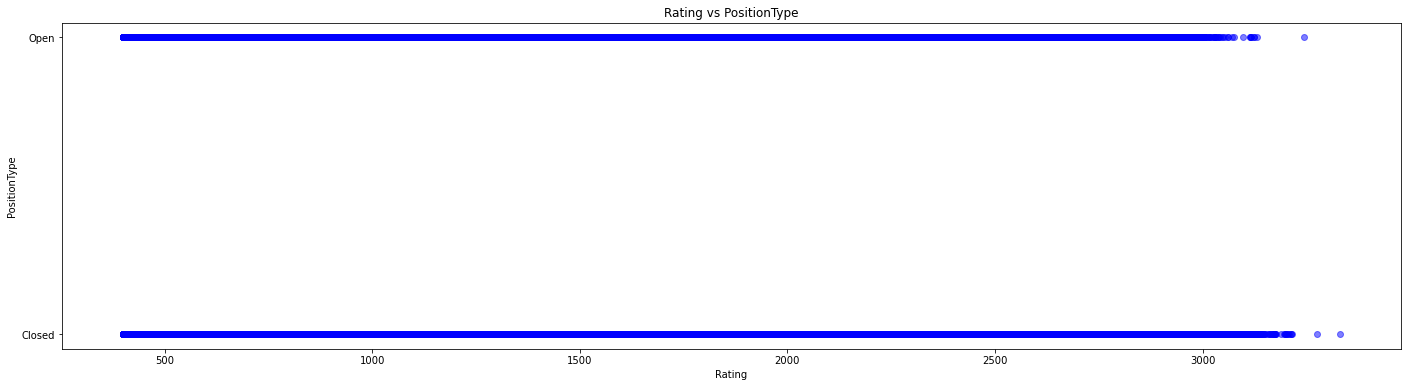

In [47]:
plt.figure(figsize=(24, 6))
plt.scatter(df['Rating'], df['PositionType'], alpha=0.5, color='blue')
plt.title('Rating vs PositionType')
plt.xlabel('Rating')
plt.ylabel('PositionType')
plt.show()

### Attacking Potential

In [48]:
# Function to estimate attacking potential based on the number of pieces that can attack key squares around the opponent's king
def calculate_attacking_potential(fen_string):
    board_state, active_color = fen_string.split()[0], fen_string.split()[1]
    
    rows = board_state.split('/')
    
    expanded_rows = []
    for row in rows:
        expanded_row = ""
        for char in row:
            if char.isdigit():
                expanded_row += "." * int(char)  # Empty squares represented by '.'
            else:
                expanded_row += char
        expanded_rows.append(expanded_row)
    
    white_king_pos = None
    black_king_pos = None
    for r, row in enumerate(expanded_rows):
        if 'K' in row:
            white_king_pos = (r, row.index('K'))
        if 'k' in row:
            black_king_pos = (r, row.index('k'))
    
    def get_surrounding_squares(king_pos):
        if king_pos is None:
            return []
        row, col = king_pos
        surrounding_squares = [(row + i, col + j) for i in range(-1, 2) for j in range(-1, 2) if 0 <= row + i < 8 and 0 <= col + j < 8]
        return surrounding_squares
    
    white_king_surroundings = get_surrounding_squares(white_king_pos)
    black_king_surroundings = get_surrounding_squares(black_king_pos)
    
    def count_attacking_pieces(surrounding_squares, rows, active_color):
        attacking_pieces = 0
        if not surrounding_squares:
            return attacking_pieces  # Return 0 if no king is found
        
        attacking_pieces_chars = ['R', 'N', 'B', 'Q'] if active_color == 'w' else ['r', 'n', 'b', 'q']
        
        for square in surrounding_squares:
            row, col = square
            piece = rows[row][col]
            if piece in attacking_pieces_chars:
                attacking_pieces += 1
                
        return attacking_pieces

    if active_color == 'w':
        white_attacking_potential = count_attacking_pieces(black_king_surroundings, expanded_rows, 'w')
        black_attacking_potential = count_attacking_pieces(white_king_surroundings, expanded_rows, 'b')
    else:
        white_attacking_potential = count_attacking_pieces(black_king_surroundings, expanded_rows, 'w')
        black_attacking_potential = count_attacking_pieces(white_king_surroundings, expanded_rows, 'b')

    return white_attacking_potential, black_attacking_potential

# Apply the function to the FEN column in the dataset
df['WhiteAttackingPotential'], df['BlackAttackingPotential'] = zip(*df['FEN'].apply(calculate_attacking_potential))


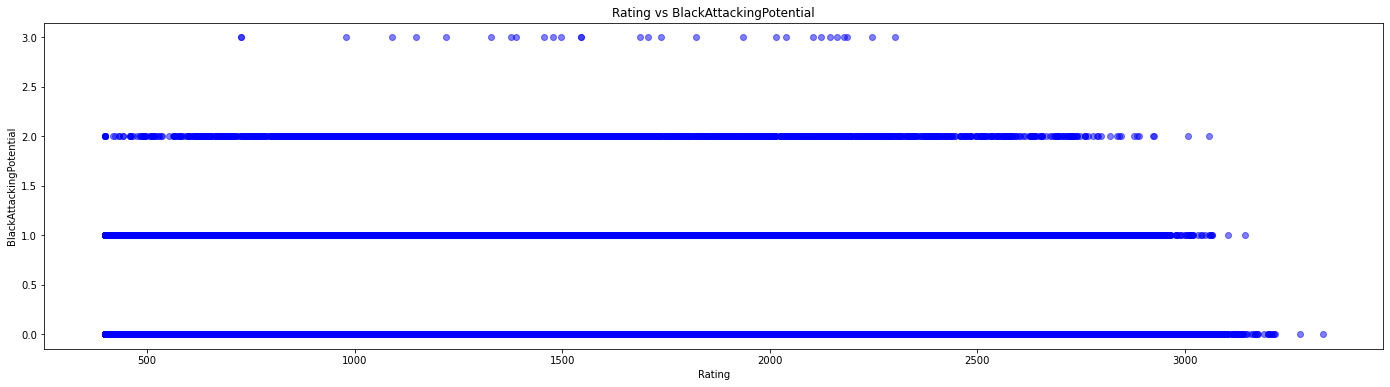

In [49]:
filtered_df = df[(df['WhiteToMove'] == 0) 
#                  & (df['GamePhase'] == "Late Middlegame")
                ]
plt.figure(figsize=(24, 6))
plt.scatter(filtered_df['Rating'], filtered_df['BlackAttackingPotential'], alpha=0.5, color='blue')
plt.title('Rating vs BlackAttackingPotential')
plt.xlabel('Rating')
plt.ylabel('BlackAttackingPotential')
plt.show()

In [50]:
def count_pieces(fen_string):
    board_state = fen_string.split()[0]
    
    piece_counts = {
        'WhitePawns': 0, 'WhiteKnights': 0, 'WhiteBishops': 0, 'WhiteRooks': 0, 'WhiteQueens': 0, 'WhiteKings': 0,
        'BlackPawns': 0, 'BlackKnights': 0, 'BlackBishops': 0, 'BlackRooks': 0, 'BlackQueens': 0, 'BlackKings': 0
    }
    
    piece_map = {
        'P': 'WhitePawns', 'N': 'WhiteKnights', 'B': 'WhiteBishops', 'R': 'WhiteRooks', 'Q': 'WhiteQueens', 'K': 'WhiteKings',
        'p': 'BlackPawns', 'n': 'BlackKnights', 'b': 'BlackBishops', 'r': 'BlackRooks', 'q': 'BlackQueens', 'k': 'BlackKings'
    }
    
    for char in board_state:
        if char in piece_map:
            piece_counts[piece_map[char]] += 1
    
    return list(piece_counts.values())

piece_columns = ['WhitePawns', 'WhiteKnights', 'WhiteBishops', 'WhiteRooks', 'WhiteQueens', 'WhiteKings',
                 'BlackPawns', 'BlackKnights', 'BlackBishops', 'BlackRooks', 'BlackQueens', 'BlackKings']

df[piece_columns] = pd.DataFrame(df['FEN'].apply(count_pieces).tolist(), index=df.index)


In [ ]:
plt.figure(figsize=(24, 12))

sns.pairplot(df[['Rating','WhitePawns', 'WhiteKnights', 'WhiteBishops', 'WhiteRooks', 'WhiteQueens', 'WhiteKings',
                 'BlackPawns', 'BlackKnights', 'BlackBishops', 'BlackRooks', 'BlackQueens', 'BlackKings']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16)
plt.show()


In [ ]:
plt.figure(figsize=(24, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Conclusion

## Further Topics

- Clustering based feature generation (Kmeans)
- Feature extraction with PCA
- Feature importance methods
- Graph based feature generation for the FEN features
- Handling missing data properly
- Outlier detection techniques
- Categorical data handling, correlation analysis, one hot encoding
- Modelling techniques, tree based or deep neural networks

Thank you for listening 

# :-)
